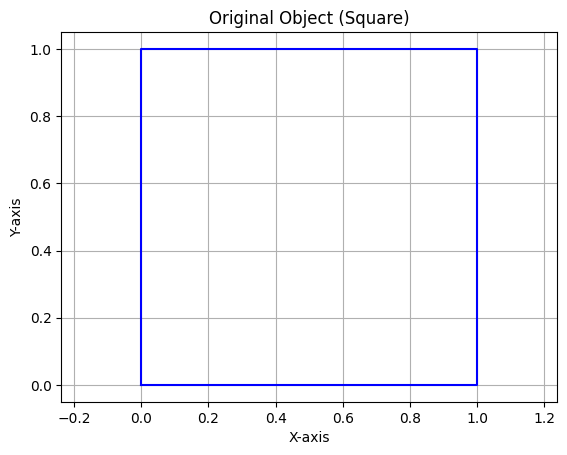

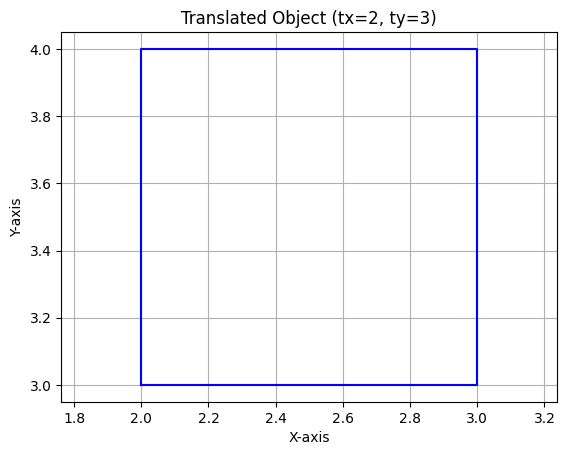

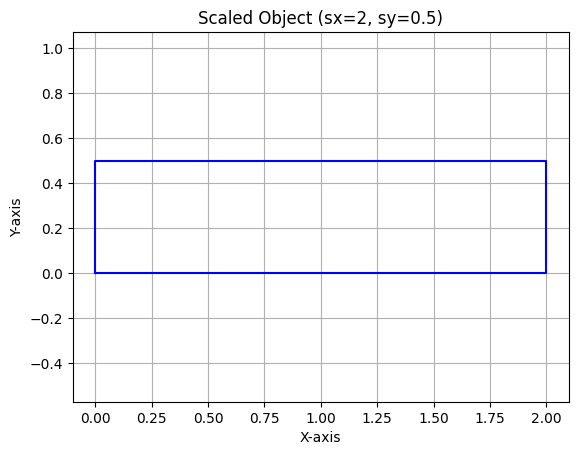

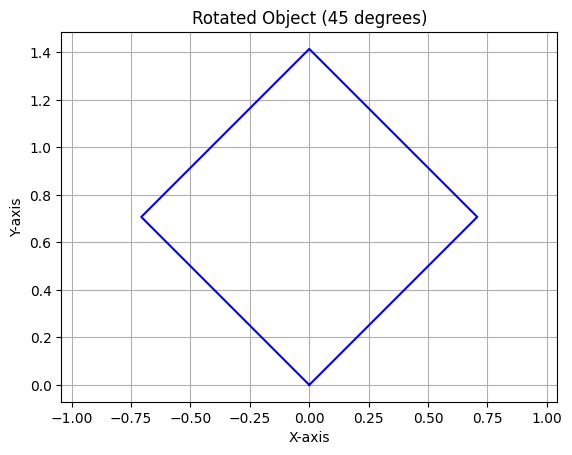

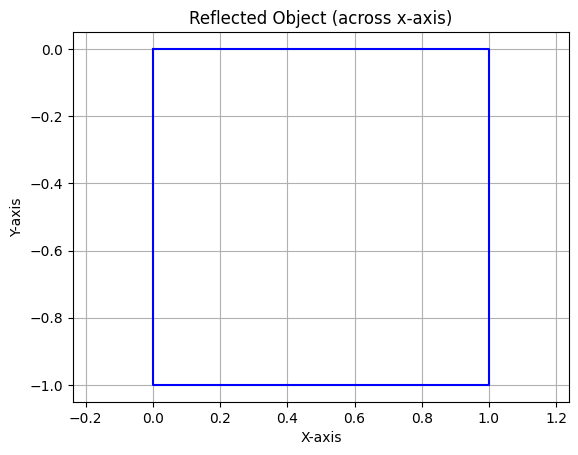

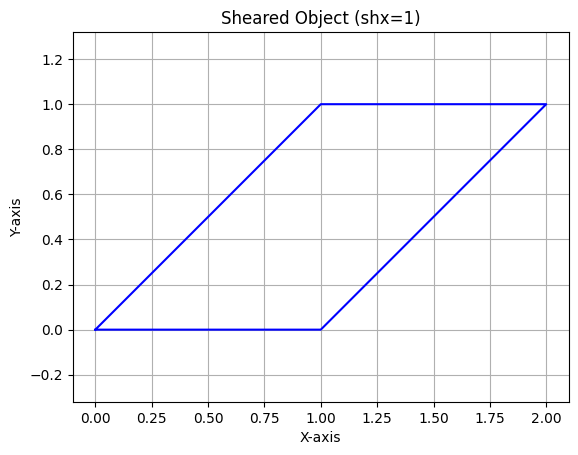

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Define a 2D object: A square (example)
square = np.array([[0, 0], [1, 0], [1, 1], [0, 1], [0, 0]])  # 4 vertices and back to the start

def plot_object(obj, title, color='blue'):
    """Plot a 2D object."""
    plt.figure()
    plt.plot(obj[:, 0], obj[:, 1], color=color)
    plt.title(title)
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.grid()
    plt.axis('equal')
    plt.show()

def translate(obj, tx, ty):
    """Translate a 2D object."""
    translation_matrix = np.array([[1, 0, tx],
                                    [0, 1, ty],
                                    [0, 0, 1]])
    obj_homogeneous = np.hstack((obj, np.ones((obj.shape[0], 1))))  # Convert to homogeneous coordinates
    transformed = np.dot(obj_homogeneous, translation_matrix.T)
    return transformed[:, :2]

def scale(obj, sx, sy):
    """Scale a 2D object."""
    scaling_matrix = np.array([[sx, 0, 0],
                                [0, sy, 0],
                                [0, 0, 1]])
    obj_homogeneous = np.hstack((obj, np.ones((obj.shape[0], 1))))  # Convert to homogeneous coordinates
    transformed = np.dot(obj_homogeneous, scaling_matrix.T)
    return transformed[:, :2]

def rotate(obj, theta):
    """Rotate a 2D object by theta degrees."""
    theta_rad = np.radians(theta)
    rotation_matrix = np.array([[np.cos(theta_rad), -np.sin(theta_rad), 0],
                                 [np.sin(theta_rad),  np.cos(theta_rad), 0],
                                 [0, 0, 1]])
    obj_homogeneous = np.hstack((obj, np.ones((obj.shape[0], 1))))  # Convert to homogeneous coordinates
    transformed = np.dot(obj_homogeneous, rotation_matrix.T)
    return transformed[:, :2]

def reflect(obj, axis):
    """Reflect a 2D object across x-axis or y-axis."""
    if axis == 'x':
        reflection_matrix = np.array([[1, 0, 0],
                                       [0, -1, 0],
                                       [0, 0, 1]])
    elif axis == 'y':
        reflection_matrix = np.array([[-1, 0, 0],
                                       [0, 1, 0],
                                       [0, 0, 1]])
    obj_homogeneous = np.hstack((obj, np.ones((obj.shape[0], 1))))  # Convert to homogeneous coordinates
    transformed = np.dot(obj_homogeneous, reflection_matrix.T)
    return transformed[:, :2]

def shear(obj, shx, shy):
    """Shear a 2D object."""
    shearing_matrix = np.array([[1, shx, 0],
                                 [shy, 1, 0],
                                 [0, 0, 1]])
    obj_homogeneous = np.hstack((obj, np.ones((obj.shape[0], 1))))  # Convert to homogeneous coordinates
    transformed = np.dot(obj_homogeneous, shearing_matrix.T)
    return transformed[:, :2]

# Demonstrate the transformations
plot_object(square, "Original Object (Square)")

# Translation
translated_square = translate(square, 2, 3)
plot_object(translated_square, "Translated Object (tx=2, ty=3)")

# Scaling
scaled_square = scale(square, 2, 0.5)
plot_object(scaled_square, "Scaled Object (sx=2, sy=0.5)")

# Rotation
rotated_square = rotate(square, 45)
plot_object(rotated_square, "Rotated Object (45 degrees)")

# Reflection
reflected_square = reflect(square, 'x')
plot_object(reflected_square, "Reflected Object (across x-axis)")

# Shearing
sheared_square = shear(square, 1, 0)
plot_object(sheared_square, "Sheared Object (shx=1)")


In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
image = cv2.imread("/content/9989.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [18]:
def display_image(img, title="Image"):
    plt.imshow(img)
    plt.title(title)
    plt.axis("off")
    plt.show()

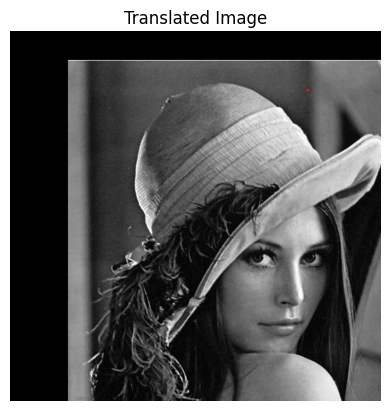

In [19]:
# 1. Translation
def translate(img, tx, ty):
    rows, cols, _ = img.shape
    translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
    return cv2.warpAffine(img, translation_matrix, (cols, rows))

translated = translate(image, 100, 50)
display_image(translated, "Translated Image")

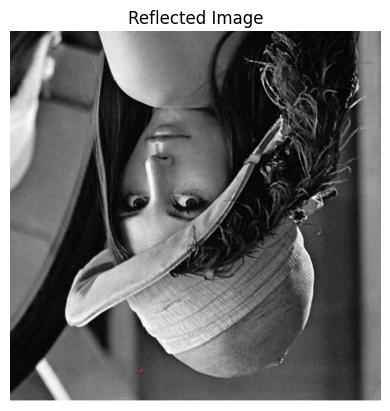

In [20]:
# 2. Reflection
def reflect(img, axis):
    if axis == 'x':
        return cv2.flip(img, 0)
    elif axis == 'y':
        return cv2.flip(img, 1)
    elif axis == 'xy':
        return cv2.flip(img, -1)

reflected = reflect(image, 'xy')
display_image(reflected, "Reflected Image")

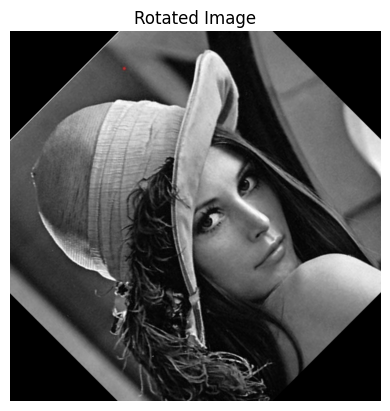

In [21]:
# 3. Rotation
def rotate(img, angle):
    rows, cols, _ = img.shape
    center = (cols // 2, rows // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    return cv2.warpAffine(img, rotation_matrix, (cols, rows))

rotated = rotate(image, 45)
display_image(rotated, "Rotated Image")


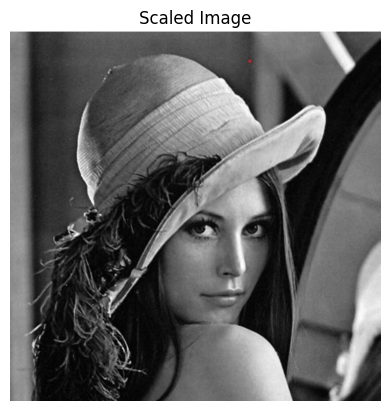

In [22]:
# 4. Scaling
def scale(img, fx, fy):
    return cv2.resize(img, None, fx=fx, fy=fy, interpolation=cv2.INTER_LINEAR)

scaled = scale(image, 1.5, 1.5)
display_image(scaled, "Scaled Image")

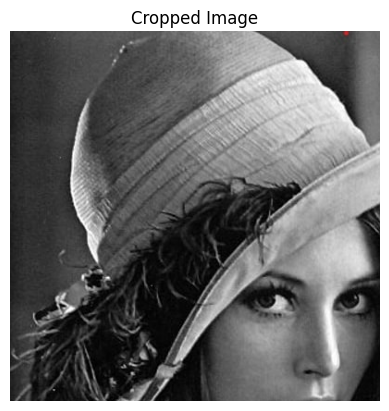

In [23]:
# 5. Cropping
def crop(img, x_start, y_start, width, height):
    return img[y_start:y_start+height, x_start:x_start+width]

cropped = crop(image, 50, 50, 400, 400)
display_image(cropped, "Cropped Image")

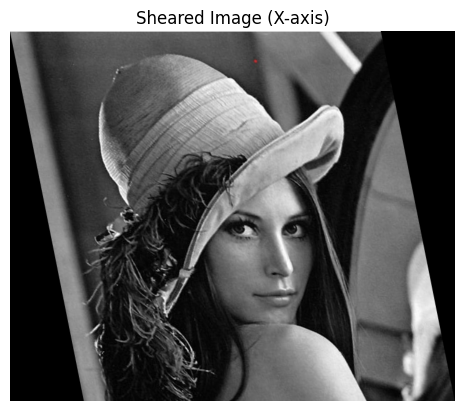

In [24]:
# 6. Shearing in x-axis
def shear_x(img, shx):
    rows, cols, _ = img.shape
    shear_matrix = np.float32([[1, shx, 0], [0, 1, 0]])
    return cv2.warpAffine(img, shear_matrix, (int(cols * (1 + abs(shx))), rows))

sheared_x = shear_x(image, 0.2)
display_image(sheared_x, "Sheared Image (X-axis)")

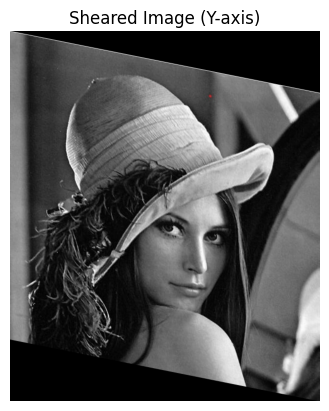

In [25]:
# 7. Shearing in y-axis
def shear_y(img, shy):
    rows, cols, _ = img.shape
    shear_matrix = np.float32([[1, 0, 0], [shy, 1, 0]])
    return cv2.warpAffine(img, shear_matrix, (cols, int(rows * (1 + abs(shy)))))

sheared_y = shear_y(image, 0.2)
display_image(sheared_y, "Sheared Image (Y-axis)")